In [22]:
import pandas as pd

In [23]:
data = pd.read_csv("Admission_Predict.csv")

In [24]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [25]:
data.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [29]:
from sklearn.preprocessing import Binarizer

In [33]:
bi = Binarizer(threshold=0.75)
data['Chance of Admit '] = bi.fit_transform(data[['Chance of Admit ']])

In [40]:
x = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit '].astype('int')

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
c = DecisionTreeClassifier(random_state = 0)


In [45]:
c = DecisionTreeClassifier(random_state = 0)


In [46]:
c.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [47]:
y_pred = c.predict(x_test)


In [48]:
result = pd.DataFrame({
    'Actual' : y_test,
    'predicted' : y_pred
})

In [49]:
result

,Actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

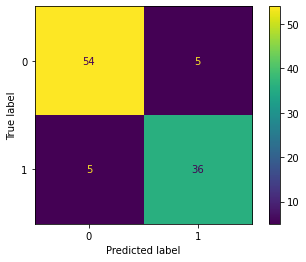

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)